# 6.5 Unsupervised Machine Learning - Clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/BIXI Project Analysis/02 Data'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'bixitrips_weather_last.pkl'))

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(20)

,start_station_code,end_station_code,duration_sec,is_member,yearid,date,start_time,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,month,season,day_of_week,distance,monthly_trip_count
10143245,7060,7060,1860.0,True,2017,2017-04-15,00:00:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de l'Église / de Verdun,45.463001,-73.571569,4,Spring,Saturday,0.000000,187883
10143246,7060,6406,1020.0,True,2017,2017-04-15,09:37:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143247,7060,6406,1080.0,True,2017,2017-04-15,09:37:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Marché Atwater,45.480208,-73.577599,4,Spring,Saturday,1.970269,187883
10143248,7060,6712,2160.0,True,2017,2017-04-15,11:34:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,LaSalle / Crawford,45.437914,-73.582740,4,Spring,Saturday,2.922527,187883
10143249,7060,6052,3120.0,False,2017,2017-04-15,11:53:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883
10143250,7060,6052,2760.0,False,2017,2017-04-15,11:54:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / King,45.498030,-73.552665,4,Spring,Saturday,4.164580,187883
10143251,7060,6705,300.0,True,2017,2017-04-15,12:39:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,5e avenue / Bannantyne,45.456365,-73.576140,4,Spring,Saturday,0.819509,187883
10143252,7060,7057,300.0,True,2017,2017-04-15,12:50:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,2e avenue / Wellington,45.457894,-73.567528,4,Spring,Saturday,0.649512,187883
10143253,7060,7056,2760.0,True,2017,2017-04-15,13:26:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,Godin / Bannantyne,45.447554,-73.577263,4,Spring,Saturday,1.774168,187883
10143254,7060,6036,1020.0,False,2017,2017-04-15,14:55:00,4.70,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,de l'Église / de Verdun,45.463001,-73.571569,de la Commune / St-Sulpice,45.504242,-73.553469,4,Spring,Saturday,4.798007,187883


##### Transforming categorical columns to numerical values so I can explore relationships

In [6]:
# Convert 'is_member' to numerical values (True -> 1, False -> 0)
df['is_member'] = df['is_member'].astype(int)

In [7]:
df['is_member'].value_counts()

is_member
1    15206349
0     3187679
Name: count, dtype: int64

In [8]:
# Encoding 'season'
season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}
df['season_encoded'] = df['season'].map(season_mapping)

In [9]:
df['season_encoded'].value_counts()

season_encoded
1    9861917
2    5310174
0    3221937
Name: count, dtype: int64

In [10]:
df['season'].value_counts()

season
Summer    9861917
Fall      5310174
Spring    3221937
Name: count, dtype: int64

In [10]:
# Encoding "day_of_week"
day_of_week_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['day_of_week_encoded'] = df['day_of_week'].map(day_of_week_mapping)

In [11]:
df['day_of_week_encoded'].value_counts()

day_of_week_encoded
2    2845165
3    2829312
4    2759182
1    2724579
5    2473666
0    2454504
6    2307620
Name: count, dtype: int64

In [13]:
df['day_of_week'].value_counts()

day_of_week
Wednesday    2845165
Thursday     2829312
Friday       2759182
Tuesday      2724579
Saturday     2473666
Monday       2454504
Sunday       2307620
Name: count, dtype: int64

In [12]:
# Create a subset
df = df[['duration_sec','is_member','yearid','prectot','rh2m','t2m','t2m_max','t2m_min','t2m_range','ws10m','ws10m_min','ws10m_max','ws10m_range','month','distance','monthly_trip_count','season_encoded','day_of_week_encoded']]

In [20]:
df.head()

,start_station_code,end_station_code,duration_sec,is_member,yearid,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,month,distance,monthly_trip_count,season_encoded,day_of_week_encoded
10143245,7060,7060,1860.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,0.000000,187883,0,5
10143246,7060,6406,1020.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,1.970269,187883,0,5
10143247,7060,6406,1080.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,1.970269,187883,0,5
10143248,7060,6712,2160.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,2.922527,187883,0,5
10143249,7060,6052,3120.0,0,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,4.164580,187883,0,5


In [13]:
# Standardize the data
scaler = StandardScaler()  # Sets 'scaler' as a shortcut
columns = df.columns.values.tolist()  # Create a list of column names for your df
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns)  # Run the scaler on your df to a new 'df_scaled'
print(df_scaled.head())  # Show scaled df
print(df.head())  # Compare with original df

   duration_sec  is_member    yearid   prectot      rh2m       t2m   t2m_max  \
0      1.616187   0.457852 -1.354739  0.613514  1.063055 -1.093741 -0.826649   
1      0.303836   0.457852 -1.354739  0.613514  1.063055 -1.093741 -0.826649   
2      0.397576   0.457852 -1.354739  0.613514  1.063055 -1.093741 -0.826649   
3      2.084884   0.457852 -1.354739  0.613514  1.063055 -1.093741 -0.826649   
4      3.584713  -2.184113 -1.354739  0.613514  1.063055 -1.093741 -0.826649   

    t2m_min  t2m_range     ws10m  ws10m_min  ws10m_max  ws10m_range     month  \
0 -1.661781   1.893658  0.093087  -0.449152  -0.090542     0.189267 -1.911232   
1 -1.661781   1.893658  0.093087  -0.449152  -0.090542     0.189267 -1.911232   
2 -1.661781   1.893658  0.093087  -0.449152  -0.090542     0.189267 -1.911232   
3 -1.661781   1.893658  0.093087  -0.449152  -0.090542     0.189267 -1.911232   
4 -1.661781   1.893658  0.093087  -0.449152  -0.090542     0.189267 -1.911232   

   distance  monthly_trip_count 

In [14]:
# Elbow Technique
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 


score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-9.587344770079636e+17,
 -3.1951518317444026e+17,
 -1.634078725191022e+17,
 -7.626979660301291e+16,
 -4.1024547485112104e+16,
 -2.6599839064619856e+16,
 -1.8783412796505628e+16,
 -1.2151850412409112e+16,
 -9186633866442088.0]

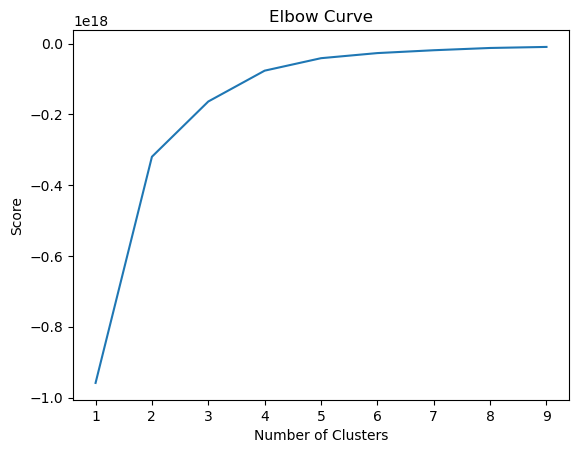

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The optimal count of clusters is four.

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df.head()

,duration_sec,is_member,yearid,prectot,rh2m,t2m,t2m_max,t2m_min,t2m_range,ws10m,ws10m_min,ws10m_max,ws10m_range,month,distance,monthly_trip_count,season_encoded,day_of_week_encoded,clusters
10143245,1860.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,0.000000,187883,0,5,1
10143246,1020.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,1.970269,187883,0,5,1
10143247,1080.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,1.970269,187883,0,5,1
10143248,2160.0,1,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,2.922527,187883,0,5,1
10143249,3120.0,0,2017,4.7,85.38,9.49,16.07,0.75,15.32,3.29,1.38,4.45,3.06,4,4.164580,187883,0,5,1


In [22]:
df['clusters'].value_counts()

clusters
2    9836687
3    4543705
0    2139033
1    1874603
Name: count, dtype: int64

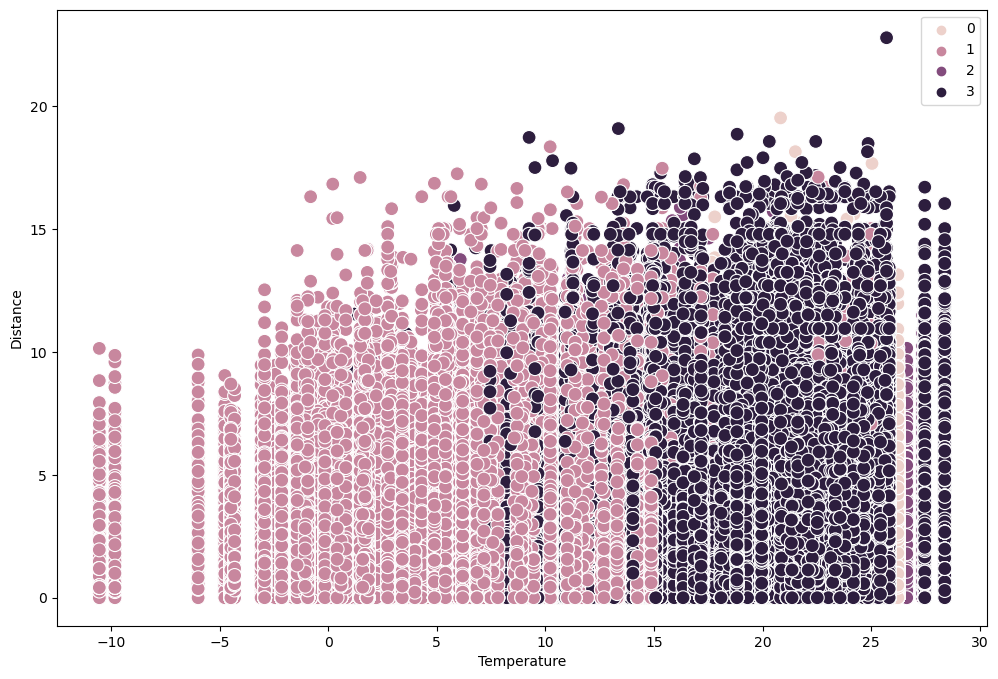

In [20]:
# Plot the clusters for the 'distance' and 't2m' variables.
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df['t2m'], y=df['distance'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Temperature')
plt.ylabel('Distance')

# Save the chart as a PNG file
plt.savefig('clusters_distance_temperature.png')
plt.show()

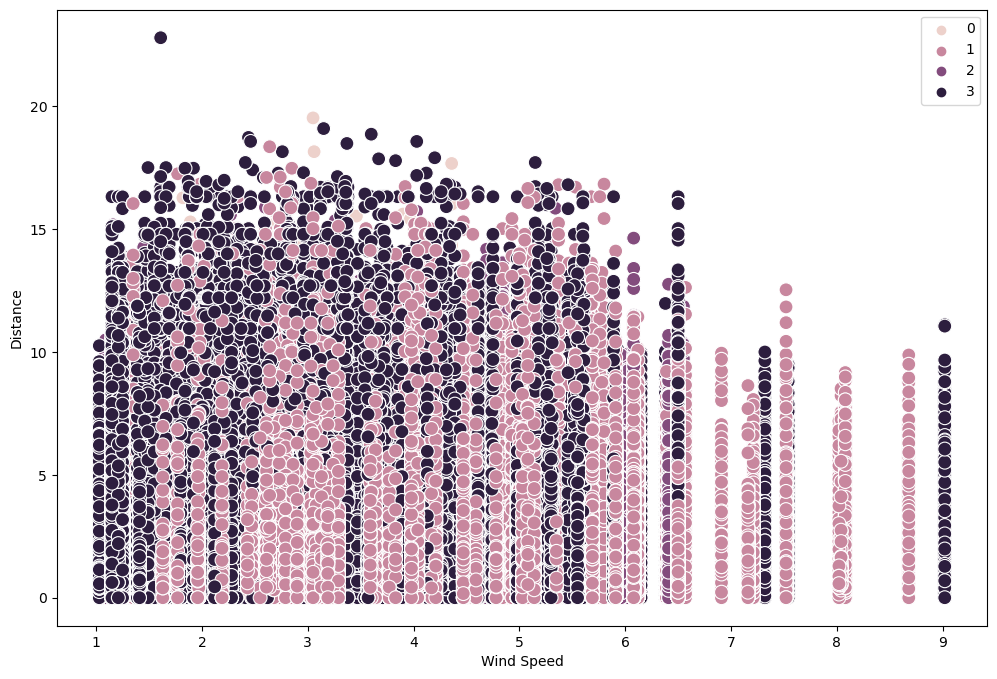

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['ws10m'], y=df['distance'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Wind Speed')
plt.ylabel('Distance') 

# Save the chart as a PNG file
plt.savefig('clusters_distance_windspeed.png')
plt.show()

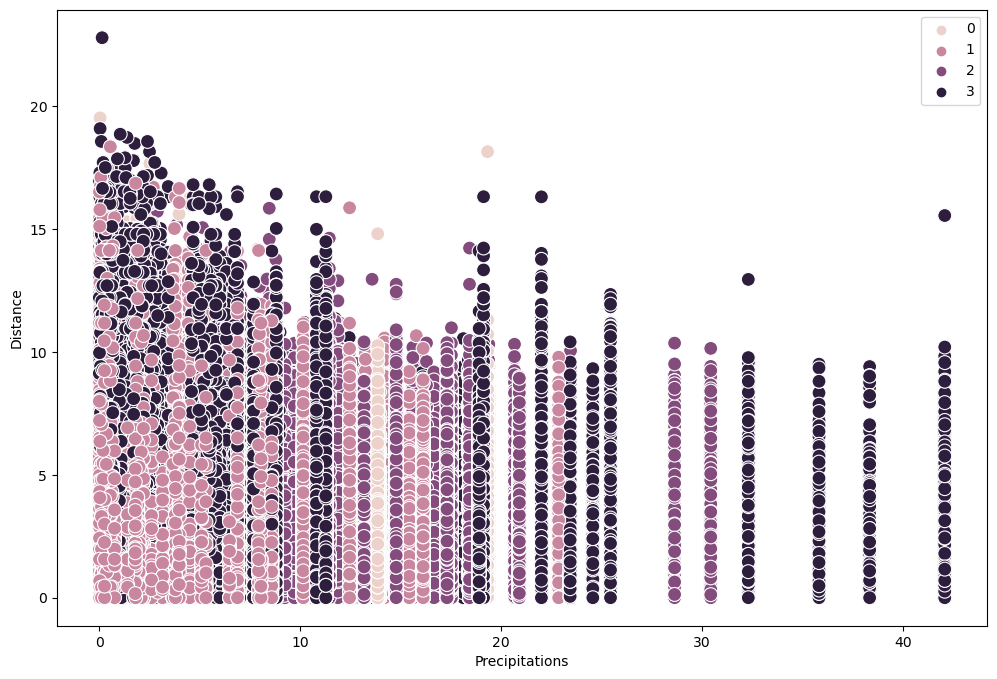

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['prectot'], y=df['distance'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Precipitations')
plt.ylabel('Distance')

# Save the chart as a PNG file
plt.savefig('clusters_distance_precipitations.png')
plt.show()

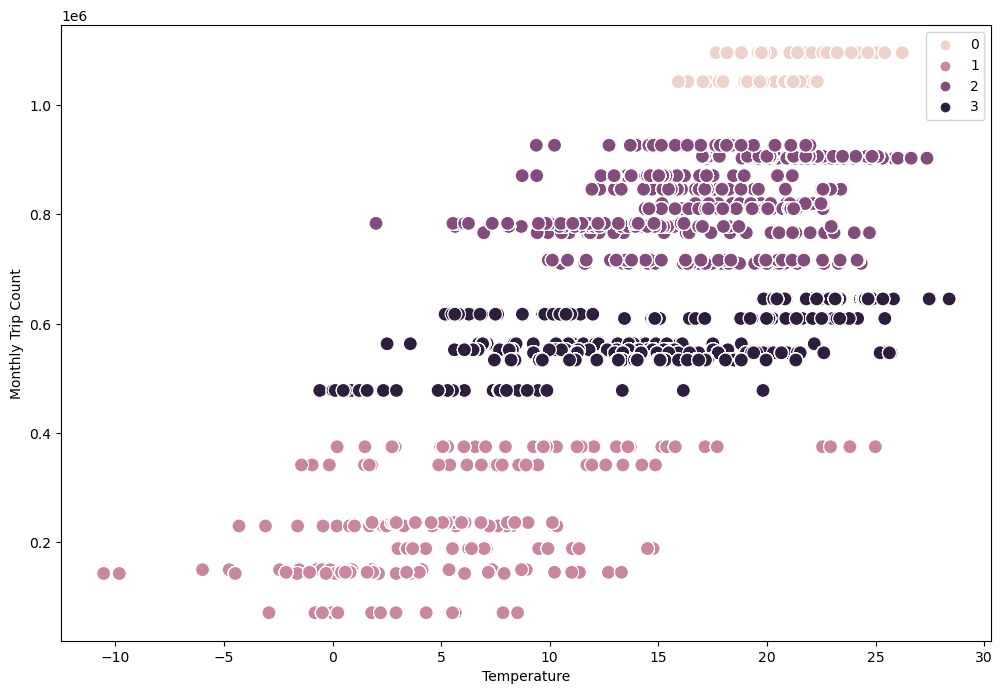

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['t2m'], y=df['monthly_trip_count'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Temperature')
plt.ylabel('Monthly Trip Count') 

# Save the chart as a PNG file
plt.savefig('clusters_tripcount_temp.png')
plt.show()

The scatterplots comparing weather variables (temperature, precipitation, or wind speed) to distance are challenging to interpret due to the overlapping data points. According to the cluster counts, there should be more instances of the purple cluster, but they are less visible in the charts. However, certain patterns can still be observed:

Dark Purple and Pink Clusters: These clusters represent users who are more likely to use Bixi bikes during extreme weather conditions, such as low temperatures, high precipitation, or strong winds. They're more spread across various conditions.

Light Pink and Purple Clusters: These clusters appear more concentrated in the scatterplots, indicating that users in these clusters tend to use Bixi bikes under less extreme weather conditions. This clustering is particularly evident in the charts, where these colors form tighter groups (very visible in the last chart).

Seasonality is noticeable in the last chart, where the light pink cluster represents the warmest months, followed by the purple cluster. This suggests that users in the light pink cluster are more active during the warmer seasons.

##### Spread Analysis:

Dark Purple Cluster: This cluster shows a broader spread, indicating that users in this group tend to take longer trips. The spread is noticeable both vertically (distance) and horizontally (weather variables), suggesting a wide range of trip distances under various weather conditions.

Pink Cluster: The pink cluster also shows a wider spread and is more prominent in some extreme weather conditions, such as negative temperatures and wind speed.

##### Distance Analysis:

Dark Purple Cluster: Users in this cluster tend to use Bixi bikes for longer distances. This is evident from the spread across the charts, showing that these users are willing to take longer trips regardless of weather conditions. However, those longer trips tend to be taken during less extreme weather conditions (warm temperatures, low precipitation, and wind).

In [27]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [28]:
df.groupby('cluster').agg({'t2m':['mean', 'median'], 
                         'ws10m':['mean', 'median'], 
                         'prectot':['mean', 'median'],
                           'monthly_trip_count':['mean', 'median'],
                          'distance':['mean', 'median']})

t2m            ws10m          prectot         \
                  mean median      mean median      mean median   
cluster                                                           
dark purple  14.839626  14.73  3.309245   3.16  2.414049   0.87   
light pink   20.943479  21.14  2.957608   2.80  1.995010   1.05   
pink          7.156981   7.21  3.676080   3.56  2.143296   0.48   
purple       17.432799  17.64  3.084449   2.98  2.325704   0.84   

            monthly_trip_count             distance            
                          mean     median      mean    median  
cluster                                                        
dark purple       5.724132e+05   563012.0  1.913649  1.518002  
light pink        1.070173e+06  1096019.0  1.907952  1.540445  
pink              2.497614e+05   235609.0  1.858624  1.458134  
purple            8.256057e+05   819773.0  1.883809  1.514704

The summary statistics confirm some of our previous observations:

- The mean and median temperatures are ordered similarly to the last scatterplots: light pink representing warmer months, followed by purple, dark purple, and pink.
- For other extreme weather conditions, the mean and median for light pink and purple are lower compared to pink and dark purple.
- Distance, however, appears similar. The scatterplots highlight outliers, which I believe are important to include in the analysis. Although the majority of trips are typically shorter distances, what I find interesting is the spread of distances during specific weather conditions.

The findings from the scatterplots and spread analysis provide empirical evidence to validate the hypothesis about the relationship between weather conditions and Bixi profitability. The data does show that certain weather conditions (moderate temperatures, low precipitation, moderate wind speeds) are associated with higher usage or profitability, supporting the hypothesis that such conditions are favorable for Bixi operations.

Understanding how different weather conditions impact Bixi usage can inform predictive models. Therefore, by incorporating weather data into the forecasting models, you can predict future demand and profitability.